# TP 2 - Régression linéaire
*M2 IWOCS, Apprentissage Automatique*

Brenda Tidjet

Safa Leila BENNABI

## Exercice 1 - Régression linéaire univarié 
Les données utilisées pour cet exercice décrivent les tailles d'enfants d'âge compris entre 2 et 8 ans : le fichier `ex1x.dat` correspond à leur âge et `ex1y.dat` correspond à leur taille (en mètres). On a dans ces 2 fichiers, les données de 50 enfants rangées dans le même ordre. 

Ces données constituent des exemples d'apprentissage qui vont être utilisées afin de construire un modèle de régression linéaire qui a pour objectif de prédire la taille d'un enfant à partir de son âge.

1. Tout d'abord, nous allons utiliser la fonction `loadtxt`du package `numpy`en Python (ici désigné par `np`). Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :
```
    x=np.loadtxt('ex1x.dat');
    y=np.loadtxt('ex1y.dat');
``` 

In [19]:
import numpy as np

x=np.loadtxt('data/ex1x.dat');
y=np.loadtxt('data/ex1y.dat');

2. Afficher le nuage de points $(x_i,y_i)$.

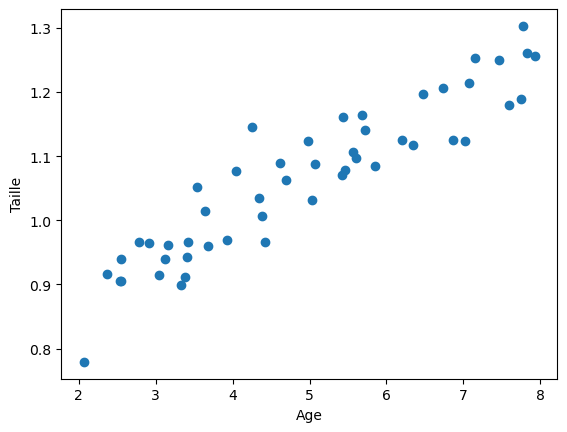

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x,y)         
plt.xlabel('Age')
plt.ylabel('Taille')
plt.show()

3. Définir en Python, la fonction hypothèse correspondant à un modèle de régression linéaire. Soit le vecteur $\theta = (\theta_0, \theta_1)$, cette fonction hypothèse s'écrit 
$$
h(\theta_0, \theta_1, x) = \theta_0 + \theta_1 x
$$

In [21]:
def h(th0, th1, x):
    return th0 + th1*x

4. Définir en Python, la fonction de coût $J(\theta_0, \theta_1)$ telle que vue en cours.

In [22]:
def J(th0, th1, x, y):
    m = len(x)
    somme = 0
    for i in range(m):
        somme += (h(th0, th1, x[i]) - y[i])**2
    return somme/(2*m)

5. Définir en Python, une fonction qui réalise une itération et qui va renvoyer $\theta_0^*$ et $\theta_1^*$, en fonction de $\theta_0$ et $\theta_1$, selon les formules de descente de gradient vue en cours.  
Pour faire fonctionner cette méthode de gradient, il faut définir la valeur du coefficient d'apprentissage noté $\alpha$ dans le cours ; il régle la profondeur de descente. On propose ici que ce coefficient prenne une valeur constante égale à 0,07. On partira aussi des valeurs initiales $\theta_0=\theta_1=0$.

In [23]:
def iteration(x,y, th0 = 0, th1=0, alpha=0.07):
    m = len(x)
    d0 = 0
    d1 = 0
    for i in range(m):
        d0 += h(th0, th1, x[i]) - y[i]
        d1 += (h(th0, th1, x[i]) - y[i])*x[i]
    th0 = th0 - alpha*d0/m
    th1 = th1 - alpha*d1/m
    return th0, th1
    

6. Faire tourner la méthode de descente de gradient sur quelques itérations puis représenter la droite 
$$
y= \theta_0 + \theta_1 x
$$
sur le nuage de points.

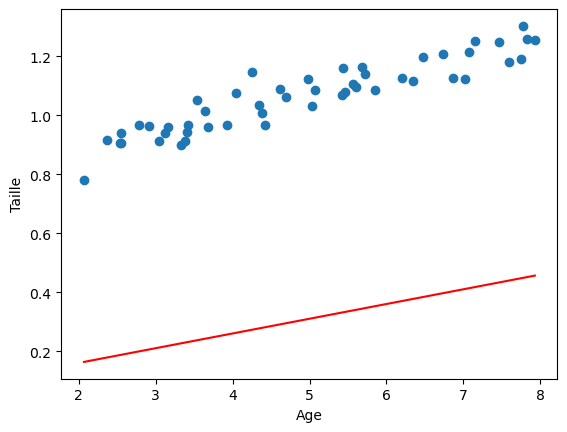

In [24]:
# faire tourner la méthode de descente de gradient sur quelques itérations
th0 = 0
th1 = 0
for i in range(10):
    th0, th1 = iteration(x,y, th0, th1)

# afficher la droite obtenue
plt.scatter(x,y)
plt.plot(x, h(th0, th1, x), color='red')
plt.xlabel('Age')
plt.ylabel('Taille')
plt.show()


7. Faire tourner la méthode de descente de gradient pendant toutes les itérations nécessaires à faire converger la solution $\theta$ recherchée. Pour cela on définit le critère d'arrêt du processus itératif par
$$
\left\vert \dfrac{J(\theta^*)-J(\theta)}{J(\theta)}\right\vert < 10^{-3}
$$
Afficher la droite obtenue suite à cette convergence sur le nuage de points.

Nombre d'itérations : 406


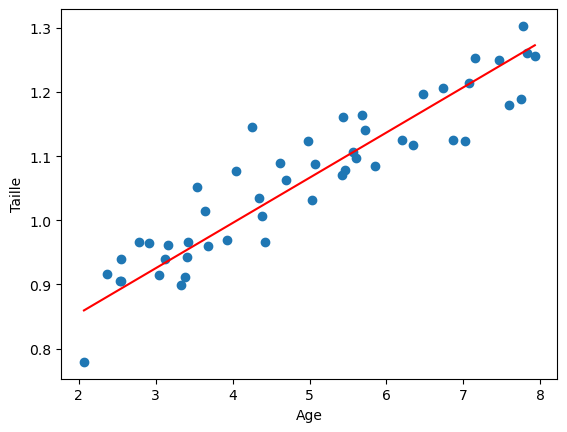

In [25]:
def descente_gradient(x, y, th0=0, th1=0, alpha=0.07, epsilon=1e-3):
    J0 = J(th0,th1,x,y)
    nb_iter = 0
    while True:
        th0, th1 = iteration(x,y, th0, th1, alpha)
        J_etoile = J(th0,th1,x,y)
        if abs(J_etoile-J0)/J0 < epsilon:
            break
        J0 = J_etoile
        nb_iter += 1
    return th0, th1, nb_iter

th0, th1, nb_iter = descente_gradient(x, y)
print('Nombre d\'itérations :', nb_iter)
plt.scatter(x,y)
plt.plot(x, h(th0, th1, x), color='red')
plt.xlabel('Age')
plt.ylabel('Taille')
plt.show()    

8. On peut désormais utiliser le modèle pour faire des prédictions : quelle est la taille de 3 enfants d'âges respectifs 3, 5 et 7 ans ?

In [26]:
print('Taille prédite pour un enfant de 3 ans :', h(th0, th1, 3))
print('Taille prédite pour un enfant de 5 ans :', h(th0, th1, 5))
print('Taille prédite pour un enfant de 7 ans :', h(th0, th1, 7))

Taille prédite pour un enfant de 3 ans : 0.925315018674473
Taille prédite pour un enfant de 5 ans : 1.066289570516874
Taille prédite pour un enfant de 7 ans : 1.207264122359275


9. Nous allons maintenant visualiser la fonction de coût $J(\theta)$ en 3D sur une grille de base 100 x 100 et des valeurs pour $\theta$ dans les intervalles suivants (il faudra donc prendre 100 valeurs réparties dans ces intervalles) : $\theta_0 \in [-30;30]$ et $\theta_1 \in [-3;3]$.  

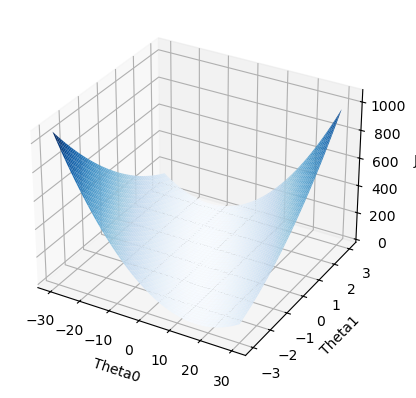

In [27]:
# Création de la grille
th0 = np.linspace(-30, 30, 100)
th1 = np.linspace(-3, 3, 100)
th0, th1 = np.meshgrid(th0, th1) # Création de la grille
J_values = np.zeros(th0.shape)  # Initialisation de la matrice des valeurs de J

# Calcul des valeurs de J
for i in range(100):
    for j in range(100):
        J_values[i,j] = J(th0[i,j], th1[i,j], x, y)
        
# Affichage de la surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot_surface(th0, th1, J_values, cmap='Blues') 
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J')
ax.set_title('');
plt.show()


## Exercice 2 - Régression linéaire multivariée et écriture matriciellle de la méthode de descente du gradient

Dans ce problème, on utilise des données correspondant à 47 exemples d'apprentissage sur des données immobilières à Portland, Oregon (USA). Les données d'entrée $x$ (stockées dans le ficheir `ex2x.dat`) correspondent aux surfaces et au nombre de pièces de ces 47 appartements et la donnée cible $y$ (stockée dans le fichier `ex2y.dat`) correspond au prix de ces mêmes appartements.

1. Utiliser la fonction `loadtxt`du package `numpy`en Python (ici désigné par `np`). Cette fonction permet de lire les fichiers et de les concertir en vecteurs/matrices :
```
    x=np.loadtxt('ex2x.dat');
    y=np.loadtxt('ex2y.dat');
``` 

In [28]:
import numpy as np

x = np.loadtxt('data/ex2x.dat')
y = np.loadtxt('data/ex2y.dat')

2. Prétraitement des données : utiliser la fonction `sklearn.preprocessing.StandardScaler` pour normaliser les données.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

3. Définir les fonctions en Python sous forme matricielle pour représenter la fonction hypothèse $h_\theta (X)$, le vecteur tel que défini dans le cours :$E = h_\theta (X) - Y$, la fonction décrivant une itération et la fonction de coût $J(\theta)$.

In [30]:
X = np.hstack((np.ones((x_scaled.shape[0], 1)), x_scaled)) # matrice X à m lignes et n+1 colonnes 
th = np.zeros((X.shape[1], 1)) # vecteur theta à n+1 lignes et 1 colonne

# fonction hypothèse
def h(X, th):
    return np.dot(X, th)
# Vecteur E
Y = y.reshape(-1, 1)
def E(X, th, Y):
    return h(X, th) - Y

# fonction de coût
def J(E):
    return 1/(2*len(E))*np.dot(E.T, E)


4. Pour la valeur du taux d'apprentissage $\alpha=0,07$, effectuer le calcul de régression permettant d'obtenir le vecteur $\theta = (\theta_0, \theta_1, \theta_2)$ optimal permettant de calculer la meilleure régression linéaire multivariée sur le jeu de données d'apprentissage.

In [31]:
th = np.zeros((X.shape[1], 1))
def decente_gradient_opt(X, Y, th, alpha, epsilon):
    res = E(X, th, Y)
    J0 = J(res)[0,0]
    nb_iterations = 0
    while True:
        th = th - alpha/len(res)*np.dot(X.T, res)        
        res = E(X, th, Y)
        J_etoile = J(res)[0,0]
        if np.isnan(J_etoile) or np.isinf(J_etoile) or np.isnan(J0) or np.isinf(J0):
            print("J_etoile ou J0 est nan ou infini")
        else:
            if abs(J_etoile - J0)/J0 < epsilon:
                break
        nb_iterations+= 1
        J0 = J_etoile
    return th, nb_iterations

In [32]:
th, nb_iterations = decente_gradient_opt(X, Y, th, 0.07, 10**-3)
print("theta optimal : ", th, "nombre d'itérations : ", nb_iterations)
#plot_regression_3d(x, y, X, th, h)

theta optimal :  [[337780.19063427]
 [102294.50642171]
 [   530.50938623]] nombre d'itérations :  66


5. Nous allons maintenant automatiser la recherche du meilleur taux d'apprentissage $\alpha \in [0,001 ; 10]$. Pour ce faire, on devra calculer pour chaque itération la valeur de la fonction de coût $J(\theta)$ et on stockera toutes ces valeurs dans un vecteur. Comme on veut sélectionner un taux d'apprentissage efficace, on va comparer les résultats de calcul de $J(\theta)$ sur 50 itérations en changenat de taux d'apprentissage à chaque série d'itérations. Les valeurs de ce taux doivent rester dans l'intervalle initialement donné $\alpha \in [0,001 ; 10]$. On tracera alors les courbes représentant en abscisse, le nombre d'itérations et en ordonnées les valeurs de la fonction de coût ; chaque courbe correspond à une valeur du taux d'apprentissage. A partir de ces courbes, sélectionner ce qui parît être le meilleur taux d'apprentissage et recalculer le vecteur $\theta$ jusqu'à la convergence. Utiliser ce vecteur $\theta$ pour prédire le prix d'un logement de 1650 m2 et de 3 pièces. 



In [33]:
# fonction de descente de gradient avec un nombre d'itérations fixé
def decente_gradient_it(X, Y, th, alpha, nb_iterations):
    Js = []
    for i in range(nb_iterations):
        E = h(X, th) - Y
        th = th - alpha/len(E)*np.dot(X.T, E)
        Js.append(J(E)[0,0])
    return th, Js

In [34]:
def recherche_alpha(X, Y, alpha_min, alpha_max, nb_iterations=50):
    alphas = np.linspace(alpha_min, alpha_max, 5)
    J_alphas = []
    for alpha in alphas:
        th = np.zeros((X.shape[1], 1))
        th, Js= decente_gradient_it(X, Y, th, alpha, nb_iterations)
        J_alphas.append(Js)
    return alphas, J_alphas

# Recherche du meilleur alpha
alphas, J_alphas = recherche_alpha(X, Y, 0.7, 1.35,10)

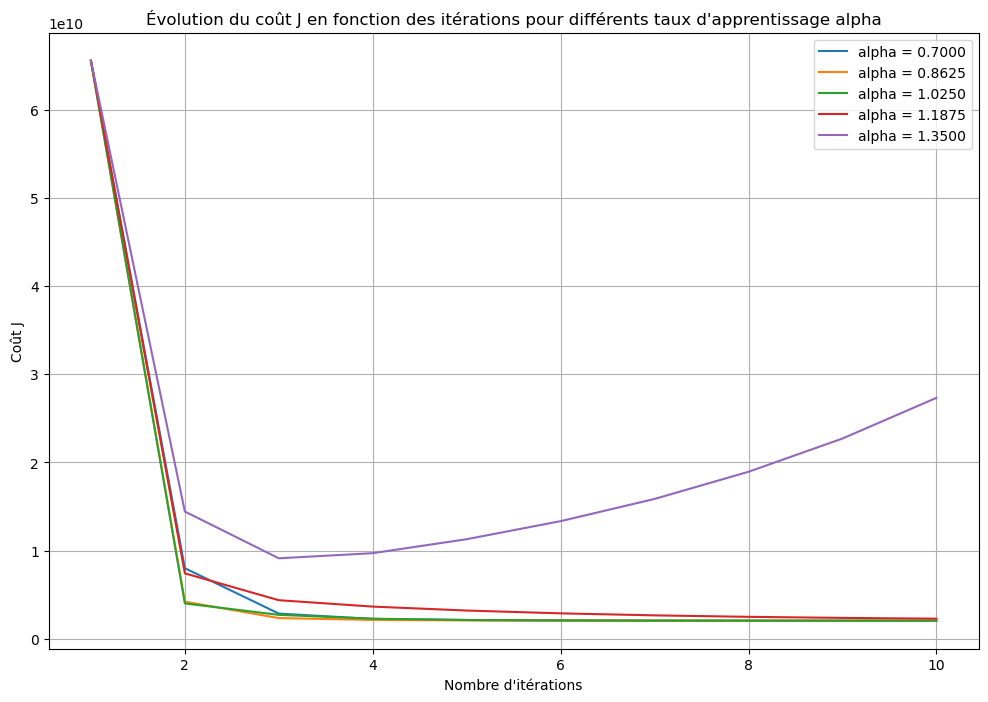

In [35]:
import matplotlib.pyplot as plt

# Tracé des courbes
plt.figure(figsize=(12, 8))

for i, alpha in enumerate(alphas):
    iterations = range(1, len(J_alphas[i]) + 1)
    plt.plot(iterations, J_alphas[i], label=f'alpha = {alpha:.4f}')

plt.xlabel('Nombre d\'itérations')
plt.ylabel('Coût J')
#plt.xlim(1.8, 3)
#plt.ylim(3.2e9, 3.7e9)
plt.title('Évolution du coût J en fonction des itérations pour différents taux d\'apprentissage alpha')
plt.legend()
plt.grid(True)
plt.show()

Utiliser le meilleur taux d'apprentissage pour calculer le vecteur theta optimal et faire une prediction du prix d'un logement de 1650 m2 et de 3 pièces.

In [36]:
th = np.zeros((X.shape[1], 1))
th, nb_iterations = decente_gradient_opt(X, Y, th, 0.86, 10**-3)
print("theta optimal : ", th, "nombre d'itérations : ", nb_iterations)
x_pred = np.array([[1650, 3]])
x_pred_scaled = scaler.transform(x_pred)
X_pred = np.hstack((np.ones((x_pred_scaled.shape[0], 1)), x_pred_scaled))

prediction = h(X_pred, th)
prix = prediction[0,0]
print(f"Prix prédit pour un logement de 1650 m2 et 3 pièces :  {prix:.7e}")

theta optimal :  [[340412.60933674]
 [108145.68944156]
 [ -5295.30868232]] nombre d'itérations :  7
Prix prédit pour un logement de 1650 m2 et 3 pièces :  2.9337212e+05
